In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import warnings

warnings.simplefilter("ignore")

sns.set(
    font="ABC Sans Nova",
    font_scale=1.25
)

geo_2006 = gpd.read_file(
    "./data/sla06aaust_shape.zip"
).iloc[:, [0, 2, 4]]
geo_2006 = geo_2006[geo_2006.STATE_CODE == "8"].iloc[:, 1:]
geo_2006.columns = ["name", "geometry"]
geo_2006.set_index("name", inplace=True)
geo_2006.to_crs(7844, inplace=True)

data_2006 = pd.read_excel(
    "./data/SLA_1996_2001_2006.xls",
    sheet_name=8,
    skiprows=6,
    skipfooter=14,
    usecols=[4, 5, 6, 7],
    names=["name", "1996", "2001", "2006"]
).iloc[4:, :].dropna(subset=["name"])
data_2006.isetitem([1, 2, 3], data_2006.iloc[:, [1, 2, 3]].astype("int"))
data_2006.set_index("name", inplace=True)

for col in data_2006.columns:
    geo_2006[col] = data_2006.loc[geo_2006.index, col]

geo_2006["lng"] = geo_2006.geometry.centroid.x
geo_2006["lat"] = geo_2006.geometry.centroid.y

data_2021 = pd.read_excel(
    "./data/abs_estimates.xlsx",
    sheet_name=1,
    skiprows=7,
    skipfooter=7,
    usecols=[0] + [i for i in range(9, 31)] + [35],
    names=["state", "name"] + [str(i) for i in range(2001, 2022)] + ["area"]
).iloc[1:, :]
data_2021 = data_2021[
    (data_2021.state == 8) &
    (data_2021.area > 0)
].iloc[:, 1:-1]
data_2021.name = data_2021.name.map(lambda x: x.replace("`", "'"))
data_2021.set_index("name", inplace=True)

geo_2021 = gpd.read_file(
    "./data/SA2_2021_AUST_SHP_GDA2020.zip"
).iloc[:, [1, 10, 14, 16]]
geo_2021.columns = ["name", "state", "area", "geometry"]
geo_2021 = geo_2021[
    (geo_2021.state == "8") &
    (geo_2021.area > 0)
].iloc[:, [0, 3]]
geo_2021.set_index("name", inplace=True)

for col in data_2021.columns:
    geo_2021[col] = data_2021.loc[geo_2021.index, col]

geo_2021["lng"] = geo_2021.geometry.centroid.x
geo_2021["lat"] = geo_2021.geometry.centroid.y

geo_2021


,geometry,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,lng,lat
name,,,,,,,,,,,,,,,,,,,,,
Aranda,"POLYGON ((149.07410 -35.25529, 149.07420 -35.2...",2565.0,2544.0,2525.0,2517.0,2527.0,2522.0,2549.0,2551.0,2553.0,...,2477.0,2460.0,2447.0,2495.0,2525.0,2575.0,2619.0,2587.0,149.080410,-35.258158
Belconnen,"POLYGON ((149.05700 -35.23908, 149.05739 -35.2...",2867.0,2884.0,2929.0,2957.0,3111.0,3163.0,3379.0,3538.0,3809.0,...,6332.0,6529.0,6743.0,7365.0,7961.0,8419.0,8458.0,8576.0,149.067625,-35.235652
Bruce,"POLYGON ((149.07380 -35.24299, 149.07340 -35.2...",2837.0,3128.0,3266.0,3312.0,3341.0,3576.0,4465.0,5399.0,5925.0,...,7010.0,7071.0,7147.0,7451.0,7734.0,7954.0,7818.0,7582.0,149.090835,-35.244040
Charnwood,"POLYGON ((149.02845 -35.19852, 149.02845 -35.1...",3178.0,3202.0,3239.0,3237.0,3198.0,3138.0,3150.0,3151.0,3157.0,...,3074.0,3039.0,3004.0,3001.0,2986.0,3076.0,3040.0,3048.0,149.034130,-35.200177
Cook,"POLYGON ((149.05724 -35.25635, 149.05803 -35.2...",2976.0,2980.0,2974.0,2959.0,2927.0,2917.0,2949.0,2972.0,2985.0,...,2949.0,2919.0,2902.0,2914.0,2915.0,2949.0,2951.0,2945.0,149.066397,-35.260074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wright,"POLYGON ((149.03122 -35.32194, 149.03139 -35.3...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1025.0,2046.0,2768.0,3197.0,3442.0,3495.0,3666.0,3806.0,149.033601,-35.319267
Molonglo - East,"POLYGON ((149.05297 -35.30160, 149.05339 -35.3...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,149.053583,-35.289102
Whitlam,"POLYGON ((149.05114 -35.26921, 149.05092 -35.2...",7.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,...,4.0,5.0,5.0,5.0,6.0,8.0,9.0,10.0,149.035845,-35.277035


In [2]:
centres_2006 = pd.DataFrame()

for year in data_2006.columns:
    for coord in ["lng", "lat"]:
        centres_2006.at[year, coord] = np.average(geo_2006[coord], weights=geo_2006[year])

centres_2006


,lng,lat
1996,149.089094,-35.315439
2001,149.089863,-35.310846
2006,149.091348,-35.306323


In [3]:
centres_2021 = pd.DataFrame()

for year in data_2021.columns:
    for coord in ["lng", "lat"]:
        centres_2021.at[year, coord] = np.average(geo_2021[coord], weights=geo_2021[year])

# population_centre["geometry"] = gpd.points_from_xy(population_centre.lng, population_centre.lat)
# population_centre.set_crs(7844, inplace=True)
centres_2021

,lng,lat
2001,149.089662,-35.310597
2002,149.089796,-35.309589
2003,149.090174,-35.308560
2004,149.090553,-35.307594
2005,149.090814,-35.306974
2006,149.091258,-35.306138
2007,149.091605,-35.304926
2008,149.092052,-35.303792
2009,149.092380,-35.302725
2010,149.092589,-35.301140


In [4]:
data_mesh_2021 = pd.read_excel(
    "./data/Mesh Block Counts, 2021.xlsx",
    sheet_name=11,
    skiprows=6,
    skipfooter=6,
    usecols=[0, 2, 4],
    names=["code", "area", "people"],
    index_col="code"
)
data_mesh_2021 = data_mesh_2021[data_mesh_2021.area > 0][["people"]]
data_mesh_2021.index = data_mesh_2021.index.astype("str")

geo_mesh_2021 = gpd.read_file(
    "./data/MB_2021_AUST_SHP_GDA2020.zip"
).iloc[:, [0, 13, 17, 19]]
geo_mesh_2021.columns = ["code", "state", "area", "geometry"]
geo_mesh_2021 = geo_mesh_2021[
    (geo_mesh_2021.state == "8") & 
    (geo_mesh_2021.area > 0)
][["code", "geometry"]]
geo_mesh_2021.set_index("code", inplace=True)

geo_mesh_2021 = geo_mesh_2021.loc[data_mesh_2021[data_mesh_2021.people > 0].index]
geo_mesh_2021["people"] = data_mesh_2021.people

geo_mesh_2021["lng"] = geo_mesh_2021.geometry.centroid.x
geo_mesh_2021["lat"] = geo_mesh_2021.geometry.centroid.y

print(
    "lat:", np.average(geo_mesh_2021.lat, weights=geo_mesh_2021.people),
    "lng:", np.average(geo_mesh_2021.lng, weights=geo_mesh_2021.people)
)


lat: -35.2870471453943 lng: 149.0958720077695


In [5]:
data_mesh_2016 = pd.read_csv(
    "./data/2016_census_mesh_block_counts.csv",
    usecols=[0, 2, 4, 5],
    header=0,
    names=["code", "area", "people", "state"],
    dtype={"code":"str"},
    index_col="code"
)
data_mesh_2016 = data_mesh_2016[
    (data_mesh_2016.area > 0) &
    (data_mesh_2016.state == 8)
][["people"]]

geo_mesh_2016 = gpd.read_file(
    "./data/mb_2016_act_shape.zip"
).iloc[:, [0, 13, 15, 16]]
geo_mesh_2016.columns = ["code", "state", "area", "geometry"]
geo_mesh_2016 = geo_mesh_2016[
    (geo_mesh_2016.state == "8") & 
    (geo_mesh_2016.area > 0)
][["code", "geometry"]]
geo_mesh_2016.set_index("code", inplace=True)
geo_mesh_2016.to_crs(7844, inplace=True)

geo_mesh_2016 = geo_mesh_2016.loc[data_mesh_2016[data_mesh_2016.people > 0].index]
geo_mesh_2016["people"] = data_mesh_2016.people

geo_mesh_2016["lng"] = geo_mesh_2016.geometry.centroid.x
geo_mesh_2016["lat"] = geo_mesh_2016.geometry.centroid.y

print(
    "lat:", np.average(geo_mesh_2016.lat, weights=geo_mesh_2016.people),
    "lng:", np.average(geo_mesh_2016.lng, weights=geo_mesh_2016.people)
)

lat: -35.29056712552838 lng: 149.09545040971773


In [6]:
data_mesh_2011 = pd.read_csv(
    "./data/censuscounts_mb_2011_aust.csv",
    usecols=[0, 1],
    header=0,
    names=["code", "people"],
    dtype={"code":"str"},
    index_col="code"
)
data_mesh_2011 = data_mesh_2011.loc[
    [x for x in data_mesh_2011.index if x[0] == "8"]
]

geo_mesh_2011 = gpd.read_file(
    "./data/mb_2011_act_shape.zip"
).iloc[:, [0, 13, 15, 16]]
geo_mesh_2011.columns = ["code", "state", "area", "geometry"]
geo_mesh_2011 = geo_mesh_2011[
    (geo_mesh_2011.state == "8") & 
    (geo_mesh_2011.area > 0)
][["code", "geometry"]]
geo_mesh_2011.set_index("code", inplace=True)
geo_mesh_2011.to_crs(7844, inplace=True)

geo_mesh_2011 = geo_mesh_2011.loc[data_mesh_2011[data_mesh_2011.people > 0].index]
geo_mesh_2011["people"] = data_mesh_2011.people

geo_mesh_2011["lng"] = geo_mesh_2011.geometry.centroid.x
geo_mesh_2011["lat"] = geo_mesh_2011.geometry.centroid.y

print(
    "lat:", np.average(geo_mesh_2011.lat, weights=geo_mesh_2011.people),
    "lng:", np.average(geo_mesh_2011.lng, weights=geo_mesh_2011.people)
)

lat: -35.29839298621663 lng: 149.09410971530738


In [7]:
centres_mesh = pd.DataFrame(columns=centres_2021.columns)
centres_mesh.loc[2011] = [
    np.average(geo_mesh_2011.lng, weights=geo_mesh_2011.people),
    np.average(geo_mesh_2011.lat, weights=geo_mesh_2011.people),
]
centres_mesh.loc[2016] = [
    np.average(geo_mesh_2016.lng, weights=geo_mesh_2016.people),
    np.average(geo_mesh_2016.lat, weights=geo_mesh_2016.people),
]
centres_mesh.loc[2021] = [
    np.average(geo_mesh_2021.lng, weights=geo_mesh_2021.people),
    np.average(geo_mesh_2021.lat, weights=geo_mesh_2021.people),
]
centres_mesh

,lng,lat
2011,149.094110,-35.298393
2016,149.095450,-35.290567
2021,149.095872,-35.287047


<AxesSubplot: xlabel='lng', ylabel='lat'>

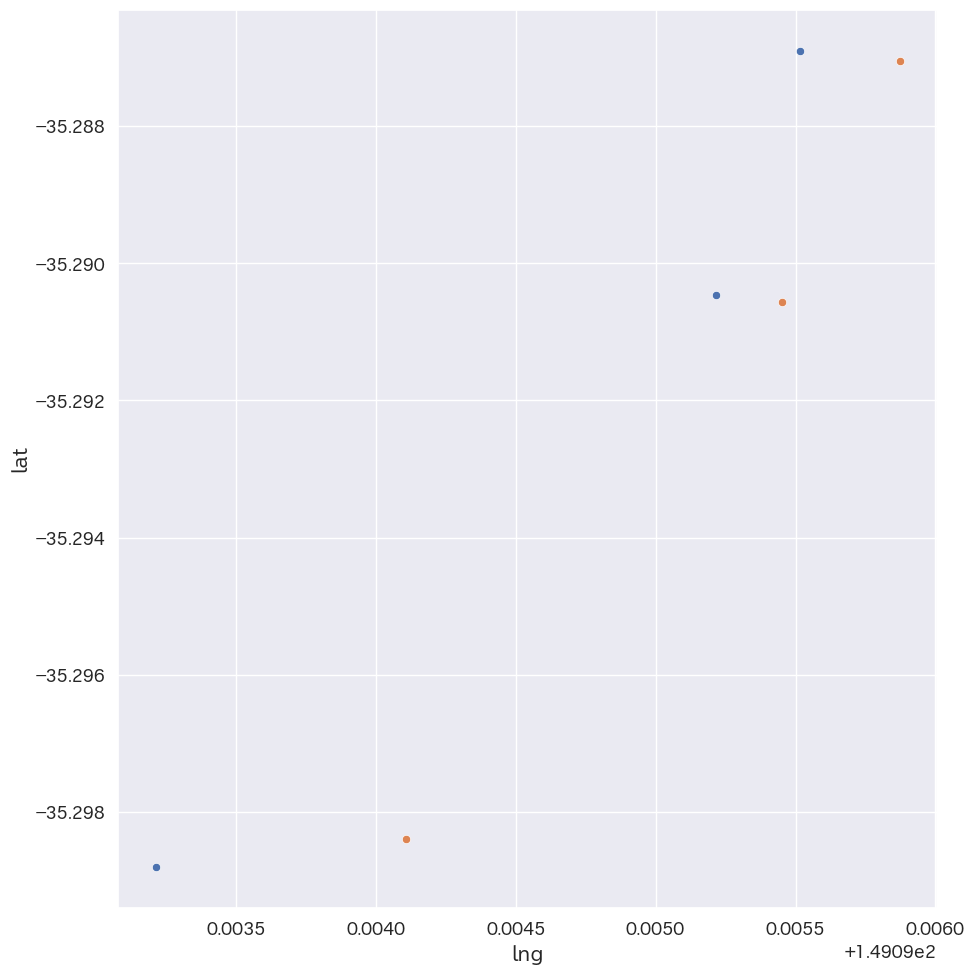

In [8]:
fig, ax = plt.subplots(
    figsize=(10, 10),
    tight_layout=True
)

sns.scatterplot(
    data=centres_2021.loc[["2011", "2016", "2021"]],
    x="lng",
    y="lat",
    ax=ax
)
sns.scatterplot(
    data=centres_mesh,
    x="lng",
    y="lat",
    ax=ax
)


In [9]:
data_future = pd.read_excel(
    "./data/projections.xlsx",
    sheet_name=6,
    skiprows=4,
    header=0,
    names=["name"] + [str(x) for x in range(2022, 2061)],
    index_col="name"
)
data_future.index = [x.replace("`", "'") for x in data_future.index]
data_future = data_future.loc[
    [x for x in data_future.index if "Total -" not in x]
]
data_future.loc["Canberra East & Airport"] = data_future.loc["Canberra East (incl Airport)"]
data_future.drop("Canberra East (incl Airport)", inplace=True)

geo_future = gpd.read_file(
    "./data/sa2_2016_aust_shape.zip"
).iloc[:, [2, 9, 11, 12]]
geo_future.columns = ["name", "state", "area", "geometry"]
geo_future = geo_future[
    (geo_future.state == "8") & 
    (geo_future.area > 0)
][["name", "geometry"]]
geo_future.set_index("name", inplace=True)
geo_future.to_crs(7844, inplace=True)

geo_future.at["Canberra East & Airport", "geometry"] = geo_future.loc[["Canberra East", "Canberra Airport"]].geometry.unary_union
geo_future.drop(["Canberra East", "Canberra Airport"], inplace=True)

geo_future = geo_future.loc[data_future.index]

geo_future["lng"] = geo_future.centroid.x
geo_future["lat"] = geo_future.centroid.y

for year in data_future.columns:
    geo_future[year] = data_future[year]

geo_future

,geometry,lng,lat,2022,2023,2024,2025,2026,2027,2028,...,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
Aranda,"POLYGON ((149.07410 -35.25529, 149.07420 -35.2...",149.080410,-35.258158,2513,2480,2447,2421,2402,2367,2352,...,2157,2171,2210,2232,2265,2301,2334,2366,2410,2444
Belconnen,"POLYGON ((149.05700 -35.23908, 149.05739 -35.2...",149.067625,-35.235652,8593,8866,9173,9484,9781,10094,10371,...,17402,17806,18212,18620,19029,19419,19802,20187,20556,20922
Bruce,"POLYGON ((149.07380 -35.24299, 149.07340 -35.2...",149.090835,-35.244040,7641,7856,8054,8250,8420,8587,8741,...,13653,13992,14324,14660,14976,15299,15609,15918,16222,16506
Charnwood,"POLYGON ((149.02845 -35.19852, 149.02845 -35.1...",149.034130,-35.200177,3066,3064,3078,3086,3095,3099,3085,...,3126,3166,3210,3276,3328,3385,3438,3500,3551,3610
Cook,"POLYGON ((149.06657 -35.25612, 149.06724 -35.2...",149.066397,-35.260074,2856,2793,2743,2721,2703,2705,2700,...,2868,2910,2952,2996,3047,3102,3144,3194,3252,3301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
O'Malley,"POLYGON ((149.11523 -35.35410, 149.11508 -35.3...",149.112807,-35.352521,919,898,879,871,849,833,810,...,616,626,647,650,655,660,667,671,676,684
Pearce,"POLYGON ((149.07641 -35.35926, 149.07648 -35.3...",149.083385,-35.362209,2636,2606,2574,2560,2555,2540,2537,...,2671,2709,2747,2792,2836,2883,2931,2986,3030,3083
Phillip,"POLYGON ((149.08243 -35.33998, 149.08244 -35.3...",149.090905,-35.347021,5349,5561,5793,6025,6252,6462,6662,...,12258,12604,12939,13274,13607,13924,14228,14524,14815,15082
Torrens,"POLYGON ((149.08182 -35.37359, 149.08178 -35.3...",149.087739,-35.372014,2346,2299,2266,2229,2202,2177,2163,...,2049,2074,2110,2136,2167,2203,2237,2274,2318,2347


In [10]:
centres_future = pd.DataFrame(columns=centres_2021.columns)
for year in geo_future.columns[3:]:
    centres_future.at[year, "lng"] = np.average(geo_future.lng, weights=geo_future[year])
    centres_future.at[year, "lat"] = np.average(geo_future.lat, weights=geo_future[year])

centres_future

,lng,lat
2022,149.095583,-35.286086
2023,149.095674,-35.285205
2024,149.095649,-35.284381
2025,149.095489,-35.28365
2026,149.095244,-35.282956
2027,149.094943,-35.282363
2028,149.094632,-35.281824
2029,149.094326,-35.281406
2030,149.094054,-35.281093
2031,149.093774,-35.280773


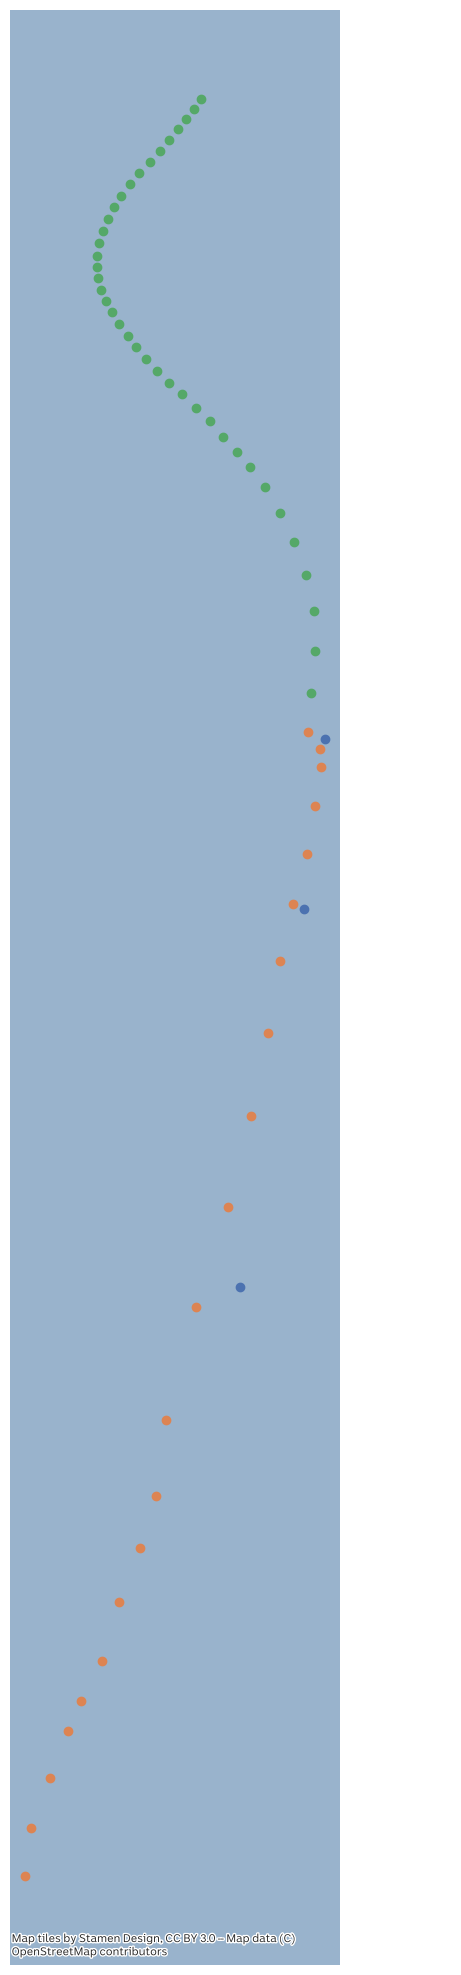

In [14]:
geocentres_mesh = gpd.GeoDataFrame(data=centres_mesh)
geocentres_mesh["geometry"] = gpd.points_from_xy(centres_mesh.lng, centres_mesh.lat)
geocentres_mesh = geocentres_mesh.set_crs(3857)
geocentres_2021 = gpd.GeoDataFrame(data=centres_2021)
geocentres_2021["geometry"] = gpd.points_from_xy(centres_2021.lng, centres_2021.lat)
geocentres_2021 = geocentres_2021.set_crs(3857)
geocentres_future = gpd.GeoDataFrame(data=centres_future)
geocentres_future["geometry"] = gpd.points_from_xy(centres_future.lng, centres_future.lat)
geocentres_future = geocentres_future.set_crs(3857)

fig, ax = plt.subplots(
    figsize=(10, 20),
    tight_layout=True
)

geocentres_mesh.plot(
    ax=ax
)
geocentres_2021.plot(
    ax=ax
)
geocentres_future.plot(
    ax=ax
)
ax.set_axis_off()
ctx.add_basemap(
    ax=ax,
    source=ctx.providers.Stamen.Terrain
)

In [42]:
centres = gpd.GeoDataFrame(pd.concat([centres_2021, centres_future]))[["geometry"]]
centres.index.name = "year"
centres.reset_index().to_file("./data/centres.geojson")
